In [206]:
#Imports
import numpy as np
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df_2019 = pd.read_csv('./2019_survey_results_public.csv')
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [207]:
df_2018 = pd.read_csv('./2018_survey_results_public.csv')
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [205]:
seaborn.reset_orig

<function seaborn.rcmod.reset_orig()>

In [455]:
df_2018.Employment.unique().tolist()

In [212]:
#Filtering dataset by all employment contract types
df_2019_filtered = df_2019[df_2019['Employment'].isin(['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time'])].dropna(subset=['Employment','Country'])
df_2018_filtered = df_2018[df_2018['Employment'].isin(['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time'])].dropna(subset=['Employment','Country'])

#Selecting Only relevant columns for graph and adding a Year Variable to allow comparison
df_2019_filtered['Year']=2019
df_2019_filtered=df_2019_filtered[['Employment','Country','Year']]

#same for 2018
df_2018_filtered['Year']=2018
df_2018_filtered=df_2018_filtered[['Employment','Country','Year']]

#Appending the two datasets above
df_total_employed = df_2019_filtered.append(df_2018_filtered)
df1.sort_values(by='Percentage', ascending=False).head(10)

,Country,Year,Employment,Percentage
337,United States,2019,18859,11.604467
336,United States,2018,18209,11.204504
139,India,2018,11313,6.961204
140,India,2019,7417,4.563886
116,Germany,2018,5748,3.536904
332,United Kingdom,2018,5623,3.459988
117,Germany,2019,5326,3.277236
333,United Kingdom,2019,5192,3.194782
61,Canada,2019,2954,1.817678
60,Canada,2018,2951,1.815832


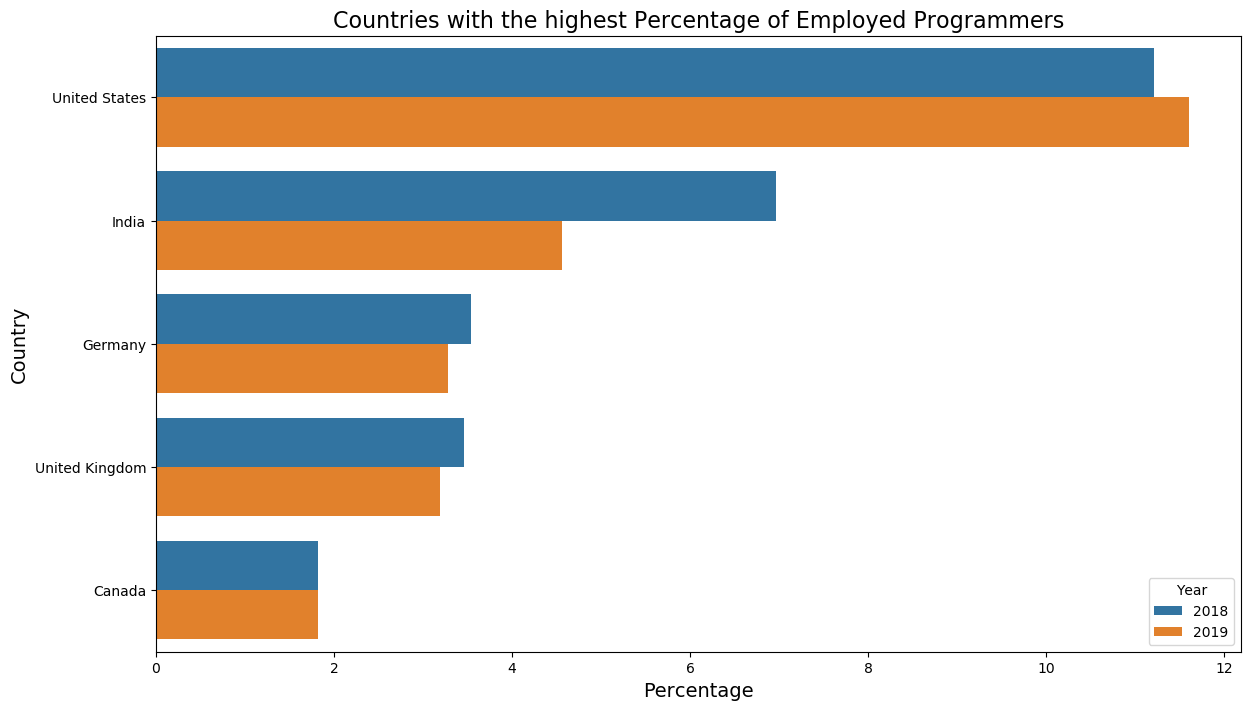

In [211]:
#Sorting and grouping datasets
df1=df_total_employed.groupby([df_total_employed.Country,df_total_employed.Year])['Employment'].count().reset_index()
df1['Percentage'] = 100 * df1['Employment']/df1['Employment'].sum()

#Plot Total Employed by Year - no matter the type of Contract
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Country',
            hue = 'Year',
            data = df1.sort_values(by='Percentage', ascending=False).head(10))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.title('Countries with the highest Percentage of Employed Programmers', size = 16)
plt.show()


In [179]:
#Most Common Contract type offered by top Countries 2019
df2=df_2019_filtered.groupby([df_2019_filtered.Country,df_2019_filtered.Employment])['Year'].count().rename('count').reset_index(name='count')
df2['Percentage'] = 100 * df2['count']/df2['count'].sum()

df2_head5=df2.sort_values(by='Percentage', ascending=False).head(5)

df2_top5_cntry=df2_head5['Country'].tolist()

df2=df2[df2['Country'].isin(df2_top5_cntry)]

#Most Common Contract type offered by top Countries 2018
df3=df_2018_filtered.groupby([df_2018_filtered.Country,df_2018_filtered.Employment])['Year'].count().rename('count').reset_index(name='count')
df3['Percentage'] = 100 * df3['count']/df3['count'].sum()

df3_head5=df3.sort_values(by='Percentage', ascending=False).head(5)

df3_top5_cntry=df3_head5['Country'].tolist()

df3=df3[df3['Country'].isin(df3_top5_cntry)]

[]

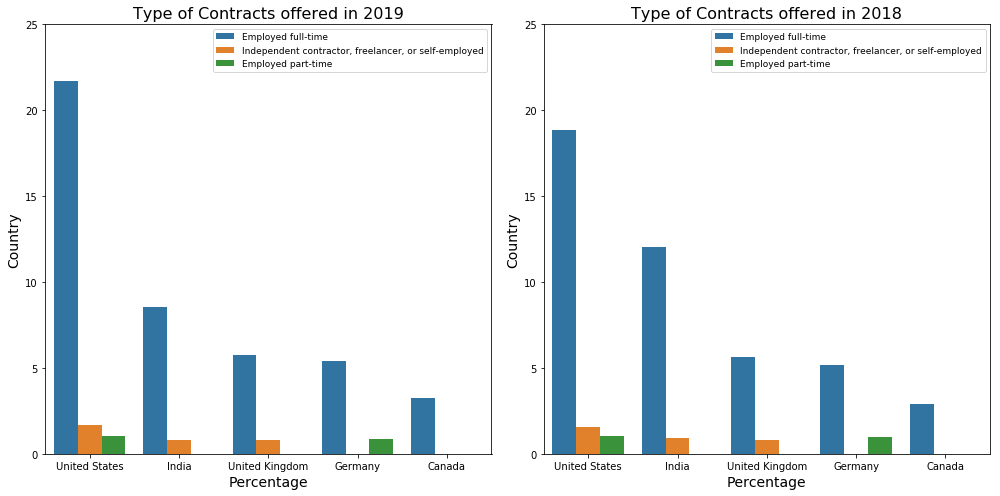

In [199]:
#Side by Side Plot
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(14,7))

a=plt.subplot(1, 2, 1)
sns.barplot(x = 'Country', 
            y = 'Percentage',
            hue = 'Employment',
            data = df2.sort_values(by='Percentage', ascending=False).head(10))
a.set_ylim(0,25)
a.set_yticklabels([0,5,10,15,20,25])
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.title('Type of Contracts offered in 2019', size = 16)

plt.legend(loc='upper right', prop={'size': 9})

b=plt.subplot(1, 2, 2)
sns.barplot(x = 'Country', 
            y = 'Percentage',
            hue = 'Employment',
            data = df3.sort_values(by='Percentage', ascending=False).head(10))
b.set_ylim(0,25)
b.set_yticklabels([0,5,10,15,20,25])
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.title('Type of Contracts offered in 2018', size = 16)

plt.legend(loc='upper right', prop={'size': 9})

fig.tight_layout()
ax2.plot()

In [181]:
#Getting only fields relevant for our next analysis
df_2019_lang = df_2019[['Country','LanguageWorkedWith','Respondent']].dropna(subset=['Country','LanguageWorkedWith','Respondent'])
df_2018_lang = df_2018[['Country','LanguageWorkedWith','Respondent']].dropna(subset=['Country','LanguageWorkedWith','Respondent'])

#This step will separate the Programming Languages in the "LanguageWorkedWith" field into several rows to allow calculations

#2018
df_2018_lang=(df_2018_lang.set_index(['Respondent', 'Country'])
   .stack()
   .str.split(';', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)  

#2019
df_2019_lang=(df_2019_lang.set_index(['Respondent', 'Country'])
   .stack()
   .str.split(';', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)                                           

#2018 data needs cleaning as in 2018 some programming languages are separate in different cells while 2019 data groups them up in the same
df_2018_lang.replace(['HTML','CSS'] , 'HTML/CSS',inplace=True)
df_2018_lang.replace('PowerShell' , 'Bash/Shell/PowerShell',inplace=True)
df_2018_lang.replace('Bash/Shell' , 'Bash/Shell/PowerShell',inplace=True)

#Removing duplicates
df_2018_lang=df_2018_lang.drop_duplicates(subset=['Respondent','LanguageWorkedWith','Country'], keep="last")

#Adding Year
df_2019_lang['Year']=2019
df_2018_lang['Year']=2018

#Most common programming languages in 2019
df_2019_lang=df_2019_lang.groupby([df_2019_lang.Country,df_2019_lang.LanguageWorkedWith])['Year'].count().rename('count').reset_index(name='count')
df_2019_lang['Percentage'] = 100 * df_2019_lang['count']/df_2019_lang['count'].sum()


#Using same top5 countries as above to evaluate most common programming languages used for work

df_2019_lang=df_2019_lang[df_2019_lang['Country'].isin(df3_top5_cntry)]

df_2019_lang.head()

#Most common programming languages in 2018

df_2018_lang=df_2018_lang.groupby([df_2018_lang.Country,df_2018_lang.LanguageWorkedWith])['Year'].count().rename('count').reset_index(name='count')
df_2018_lang['Percentage'] = 100 * df_2018_lang['count']/df_2018_lang['count'].sum()


#Using same top5 countries as above to evaluate most common programming languages used for work

df_2018_lang=df_2018_lang[df_2018_lang['Country'].isin(df3_top5_cntry)]

[]

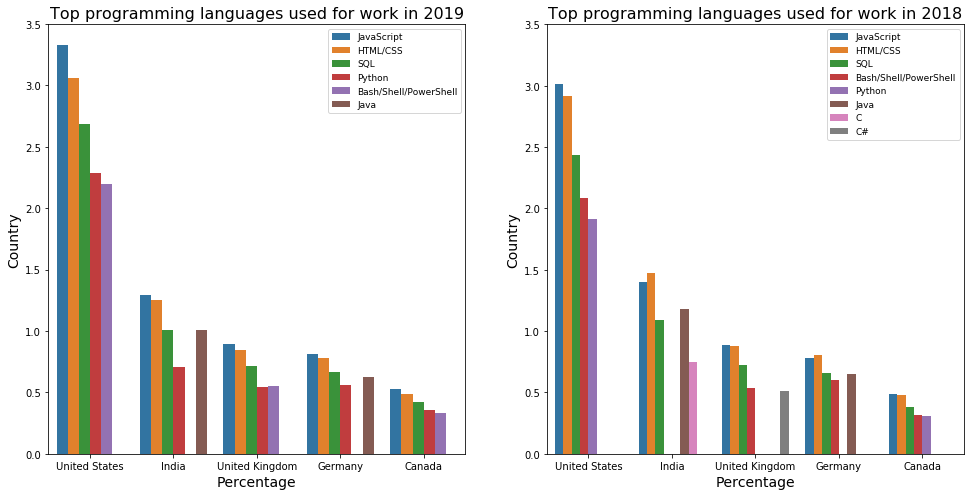

In [194]:
#Side by Side Plot
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(14,7))

plt.subplot(1, 2, 1)
sns.barplot(x = 'Country', 
            y = 'Percentage',
            hue = 'LanguageWorkedWith',
            data = df_2019_lang.sort_values(by='Percentage', ascending=False).groupby('Country',sort=False).head(5))
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.title('Top programming languages used for work in 2019', size = 16)

plt.legend(loc='upper right', prop={'size': 9})

plt.subplot(1, 2, 2)
g=sns.barplot(x = 'Country', 
            y = 'Percentage',
            hue = 'LanguageWorkedWith',
            data = df_2018_lang.sort_values(by='Percentage', ascending=False).groupby('Country',sort=False).head(5))
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.title('Top programming languages used for work in 2018', size = 16)
g.set_ylim(0.0,3.5)
g.set_yticklabels([0.0,0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

plt.legend(loc='upper right', prop={'size': 9})
fig.tight_layout()
ax2.plot()